## brief introduction to pandas

**Object creation**

in pandas there are two types of objects mainly series and dataFrames 

In [1]:
import numpy as np
import pandas as pd 

In [4]:
# creating series 
a = pd.Series([1,2,3,np.NaN,5,6,7])
a

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
6    7.0
dtype: float64

**Creating a DataFrame by passing a NumPy array, with a datetime index using date_range() and labeled columns:**

In [5]:
# create random dates
data = pd.date_range('2018-05-20',periods =10)
data


DatetimeIndex(['2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-27',
               '2018-05-28', '2018-05-29'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# using data create data frame 
df= pd.DataFrame(np.random.randn(10,4),index = data,columns=list('abcd'))
df

,a,b,c,d
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-24,-1.107591,-0.194233,0.820949,0.576809
2018-05-25,0.409101,1.723589,0.284171,1.025933
2018-05-26,1.383833,0.893468,-0.651669,-0.054531
2018-05-27,1.478786,0.736944,1.107942,-1.292552
2018-05-28,0.530333,-0.591745,1.557103,-2.450139
2018-05-29,0.915522,0.823414,0.150045,0.019168


**Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:**

In [12]:
dict = {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
df1 = pd.DataFrame(dict)

In [13]:
df1

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [14]:
# dtypes
df1.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [17]:
#head
df.head()

,a,b,c,d
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-24,-1.107591,-0.194233,0.820949,0.576809


In [18]:
df.tail()

,a,b,c,d
2018-05-25,0.409101,1.723589,0.284171,1.025933
2018-05-26,1.383833,0.893468,-0.651669,-0.054531
2018-05-27,1.478786,0.736944,1.107942,-1.292552
2018-05-28,0.530333,-0.591745,1.557103,-2.450139
2018-05-29,0.915522,0.823414,0.150045,0.019168


In [19]:
df.head(2)

,a,b,c,d
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775


**Display the DataFrame.index or DataFrame.columns:**

In [21]:
df.index

DatetimeIndex(['2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-27',
               '2018-05-28', '2018-05-29'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data.

Note that this can be an expensive operation when your DataFrame has columns with different data types,

but when we change this to numpy as it will takes all data into a object type after that we casting each column as like we want 


In [34]:
# cerating array from data frame
array = df.to_numpy()
array

array([[-1.57000556,  0.83010151,  0.15165292,  0.9590871 ],
       [ 1.85047586, -0.63115643, -0.82544468, -0.09177481],
       [ 0.040909  ,  0.13007102,  0.99311862,  0.86103758],
       [-0.66409022, -0.50094258, -1.72281803, -1.74011612],
       [-1.10759139, -0.19423263,  0.82094906,  0.57680944],
       [ 0.40910095,  1.72358886,  0.28417099,  1.02593317],
       [ 1.38383303,  0.89346753, -0.6516695 , -0.05453082],
       [ 1.47878635,  0.73694382,  1.10794239, -1.29255194],
       [ 0.53033302, -0.59174518,  1.55710266, -2.45013931],
       [ 0.91552166,  0.82341419,  0.15004508,  0.01916804]])

In [35]:
array.dtype

dtype('float64')

**For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:**
    
because it have diffrent types of data

In [39]:
array2 = df1.to_numpy()
array2

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [41]:
array2.dtype # it converted as all the data into object type 

dtype('O')

**note = DataFrame.to_numpy() does not include the index or column labels in the output.**

**describe() shows a quick statistic summary of your data:**

In [42]:
df1.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [43]:
df.describe()

,a,b,c,d
count,10.000000,10.000000,10.000000,10.000000
mean,0.326727,0.321951,0.186505,-0.218708
std,1.148899,0.795599,1.009120,1.214806
min,-1.570006,-0.631156,-1.722818,-2.450139
25%,-0.487840,-0.424265,-0.451241,-0.992358
50%,0.469717,0.433507,0.217912,-0.017681
75%,1.266755,0.828430,0.950076,0.789981
max,1.850476,1.723589,1.557103,1.025933


### Transposing your data:

In [50]:
df1.transpose
# when we write only transspose it gives method type write transpose() it gives dataFrame

<bound method DataFrame.transpose of      A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo>

In [53]:
df1.transpose()

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1.0,1.0,1.0,1.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [54]:
type(df1.transpose())

pandas.core.frame.DataFrame

### DataFrame.sort_index() sorts by an axis

In [56]:
df.sort_index(axis = 1,ascending =False)

,d,c,b,a
2018-05-20,0.959087,0.151653,0.830102,-1.570006
2018-05-21,-0.091775,-0.825445,-0.631156,1.850476
2018-05-22,0.861038,0.993119,0.130071,0.040909
2018-05-23,-1.740116,-1.722818,-0.500943,-0.664090
2018-05-24,0.576809,0.820949,-0.194233,-1.107591
2018-05-25,1.025933,0.284171,1.723589,0.409101
2018-05-26,-0.054531,-0.651669,0.893468,1.383833
2018-05-27,-1.292552,1.107942,0.736944,1.478786
2018-05-28,-2.450139,1.557103,-0.591745,0.530333
2018-05-29,0.019168,0.150045,0.823414,0.915522


In [59]:
df.sort_index(ascending=False) # defaultly it takes index to short vaules

,a,b,c,d
2018-05-29,0.915522,0.823414,0.150045,0.019168
2018-05-28,0.530333,-0.591745,1.557103,-2.450139
2018-05-27,1.478786,0.736944,1.107942,-1.292552
2018-05-26,1.383833,0.893468,-0.651669,-0.054531
2018-05-25,0.409101,1.723589,0.284171,1.025933
2018-05-24,-1.107591,-0.194233,0.820949,0.576809
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-20,-1.570006,0.830102,0.151653,0.959087


### DataFrame.sort_values() sorts by values:

In [61]:
df.sort_values(by = 'a') # try with shift+tab

,a,b,c,d
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-24,-1.107591,-0.194233,0.820949,0.576809
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-25,0.409101,1.723589,0.284171,1.025933
2018-05-28,0.530333,-0.591745,1.557103,-2.450139
2018-05-29,0.915522,0.823414,0.150045,0.019168
2018-05-26,1.383833,0.893468,-0.651669,-0.054531
2018-05-27,1.478786,0.736944,1.107942,-1.292552
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775


In [63]:
df.sort_values(by = 'a'and'b')

,a,b,c,d
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-28,0.530333,-0.591745,1.557103,-2.450139
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-24,-1.107591,-0.194233,0.820949,0.576809
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-27,1.478786,0.736944,1.107942,-1.292552
2018-05-29,0.915522,0.823414,0.150045,0.019168
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-26,1.383833,0.893468,-0.651669,-0.054531
2018-05-25,0.409101,1.723589,0.284171,1.025933


# Selection

**While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work,**

**for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().**

## getting

In [66]:
df['a'] # series

2018-05-20   -1.570006
2018-05-21    1.850476
2018-05-22    0.040909
2018-05-23   -0.664090
2018-05-24   -1.107591
2018-05-25    0.409101
2018-05-26    1.383833
2018-05-27    1.478786
2018-05-28    0.530333
2018-05-29    0.915522
Freq: D, Name: a, dtype: float64

In [67]:
type(df['a'])

pandas.core.series.Series

In [68]:
df[0:3]

,a,b,c,d
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-22,0.040909,0.130071,0.993119,0.861038


In [70]:
df[0:9:2]

,a,b,c,d
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-24,-1.107591,-0.194233,0.820949,0.576809
2018-05-26,1.383833,0.893468,-0.651669,-0.054531
2018-05-28,0.530333,-0.591745,1.557103,-2.450139


### Selection by label

In [73]:
df.iloc[:,['a':'c']]

SyntaxError: invalid syntax (433287611.py, line 1)

In [76]:
df.iloc[0:5]

,a,b,c,d
2018-05-20,-1.570006,0.830102,0.151653,0.959087
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-24,-1.107591,-0.194233,0.820949,0.576809


In [79]:
df.iloc[:,['a','c']]

IndexError: .iloc requires numeric indexers, got ['a' 'c']

In [81]:
df.loc[:,['a','c']]

,a,c
2018-05-20,-1.570006,0.151653
2018-05-21,1.850476,-0.825445
2018-05-22,0.040909,0.993119
2018-05-23,-0.664090,-1.722818
2018-05-24,-1.107591,0.820949
2018-05-25,0.409101,0.284171
2018-05-26,1.383833,-0.651669
2018-05-27,1.478786,1.107942
2018-05-28,0.530333,1.557103
2018-05-29,0.915522,0.150045


**diffrence between the loc and iloc**

iloc takes index names and index number   but  loc takes the index number

In [89]:
df.iloc[0:6,[0,3]]

,a,d
2018-05-20,-1.570006,0.959087
2018-05-21,1.850476,-0.091775
2018-05-22,0.040909,0.861038
2018-05-23,-0.664090,-1.740116
2018-05-24,-1.107591,0.576809
2018-05-25,0.409101,1.025933


In [92]:
df.loc['2018-05-20':'2018-05-25',['a','c']] # you write all in index numbers or in index names

,a,c
2018-05-20,-1.570006,0.151653
2018-05-21,1.850476,-0.825445
2018-05-22,0.040909,0.993119
2018-05-23,-0.664090,-1.722818
2018-05-24,-1.107591,0.820949
2018-05-25,0.409101,0.284171


In [93]:
df.loc['2018-05-20',['a','c']] 

a   -1.570006
c    0.151653
Name: 2018-05-20 00:00:00, dtype: float64

In [116]:
# For getting a scalar value:
df.at['2018-05-20', 'a']# google it 

KeyError: '2018-05-20'

### Selection by position

**See more in Selection by Position using DataFrame.iloc() or DataFrame.iat().***

Select via the position of the passed integers:

In [101]:
df.iloc[3]

a   -0.664090
b   -0.500943
c   -1.722818
d   -1.740116
Name: 2018-05-23 00:00:00, dtype: float64

In [102]:
df.iloc[1:5]

,a,b,c,d
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-24,-1.107591,-0.194233,0.820949,0.576809


In [105]:
df.iloc[1:6,0:3] # 

,a,b,c
2018-05-21,1.850476,-0.631156,-0.825445
2018-05-22,0.040909,0.130071,0.993119
2018-05-23,-0.664090,-0.500943,-1.722818
2018-05-24,-1.107591,-0.194233,0.820949
2018-05-25,0.409101,1.723589,0.284171


In [106]:
df.iloc[1:6,:]

,a,b,c,d
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116
2018-05-24,-1.107591,-0.194233,0.820949,0.576809
2018-05-25,0.409101,1.723589,0.284171,1.025933


In [107]:
# By lists of integer position locations, similar to the NumPy/Python style:
df.iloc[[1,3,4],[1,3]]   

,b,d
2018-05-21,-0.631156,-0.091775
2018-05-23,-0.500943,-1.740116
2018-05-24,-0.194233,0.576809


**For getting a value explicitly:**

In [108]:
df.iloc[1,1]

-0.6311564343109712

**For getting fast access to a scalar (equivalent to the prior method):**

In [109]:
df.iat[1,1]

-0.6311564343109712

## Boolean indexing

**Using a single column’s values to select data:**

In [118]:
df[df['a']>0]

,a,b,c,d
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-25,0.409101,1.723589,0.284171,1.025933
2018-05-26,1.383833,0.893468,-0.651669,-0.054531
2018-05-27,1.478786,0.736944,1.107942,-1.292552
2018-05-28,0.530333,-0.591745,1.557103,-2.450139
2018-05-29,0.915522,0.823414,0.150045,0.019168


**Selecting values from a DataFrame where a boolean condition is met:**

In [119]:
df[df>0]

,a,b,c,d
2018-05-20,NaN,0.830102,0.151653,0.959087
2018-05-21,1.850476,NaN,NaN,NaN
2018-05-22,0.040909,0.130071,0.993119,0.861038
2018-05-23,NaN,NaN,NaN,NaN
2018-05-24,NaN,NaN,0.820949,0.576809
2018-05-25,0.409101,1.723589,0.284171,1.025933
2018-05-26,1.383833,0.893468,NaN,NaN
2018-05-27,1.478786,0.736944,1.107942,NaN
2018-05-28,0.530333,NaN,1.557103,NaN
2018-05-29,0.915522,0.823414,0.150045,0.019168


### Using the isin() method for filtering:

In [125]:
df2 = df.copy()

In [127]:
df2['e'] = ["one", "one", "two", "three", "four", "three","aja",'bab','ram','gnani']

In [128]:
df2

,a,b,c,d,e
2018-05-20,-1.570006,0.830102,0.151653,0.959087,one
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775,one
2018-05-22,0.040909,0.130071,0.993119,0.861038,two
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116,three
2018-05-24,-1.107591,-0.194233,0.820949,0.576809,four
2018-05-25,0.409101,1.723589,0.284171,1.025933,three
2018-05-26,1.383833,0.893468,-0.651669,-0.054531,aja
2018-05-27,1.478786,0.736944,1.107942,-1.292552,bab
2018-05-28,0.530333,-0.591745,1.557103,-2.450139,ram
2018-05-29,0.915522,0.823414,0.150045,0.019168,gnani


In [130]:
df2['e'].isin(['one','three'])

2018-05-20     True
2018-05-21     True
2018-05-22    False
2018-05-23     True
2018-05-24    False
2018-05-25     True
2018-05-26    False
2018-05-27    False
2018-05-28    False
2018-05-29    False
Freq: D, Name: e, dtype: bool

In [133]:
df2[df2['e'].isin(['one','three'])] # it is searching for that data in that row

,a,b,c,d,e
2018-05-20,-1.570006,0.830102,0.151653,0.959087,one
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775,one
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116,three
2018-05-25,0.409101,1.723589,0.284171,1.025933,three


### Setting

**Setting a new column automatically aligns the data by the indexes:**

In [140]:
s1 = pd.Series([1,2,3,4,5,6,7,8,9,10],index =pd.date_range('2018-05-20',periods = 10) )
s1

2018-05-20     1
2018-05-21     2
2018-05-22     3
2018-05-23     4
2018-05-24     5
2018-05-25     6
2018-05-26     7
2018-05-27     8
2018-05-28     9
2018-05-29    10
Freq: D, dtype: int64

In [141]:
df['f'] = s1

In [142]:
df

,a,b,c,d,f
2018-05-20,-1.570006,0.830102,0.151653,0.959087,1
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775,2
2018-05-22,0.040909,0.130071,0.993119,0.861038,3
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116,4
2018-05-24,-1.107591,-0.194233,0.820949,0.576809,5
2018-05-25,0.409101,1.723589,0.284171,1.025933,6
2018-05-26,1.383833,0.893468,-0.651669,-0.054531,7
2018-05-27,1.478786,0.736944,1.107942,-1.292552,8
2018-05-28,0.530333,-0.591745,1.557103,-2.450139,9
2018-05-29,0.915522,0.823414,0.150045,0.019168,10


**Setting values by label:**

In [144]:
df.iat[0,1] = 0

In [146]:
df.head() # see the b first row

,a,b,c,d,f
2018-05-20,-1.570006,0.000000,0.151653,0.959087,1
2018-05-21,1.850476,-0.631156,-0.825445,-0.091775,2
2018-05-22,0.040909,0.130071,0.993119,0.861038,3
2018-05-23,-0.664090,-0.500943,-1.722818,-1.740116,4
2018-05-24,-1.107591,-0.194233,0.820949,0.576809,5


**Setting by assigning with a NumPy array:**

In [150]:
df.loc['2018-05-20':'2018-05-24','d'] =  np.array([5]*(len(df)-5) )

In [152]:
df.head(8)

,a,b,c,d,f
2018-05-20,-1.570006,0.000000,0.151653,5.000000,1
2018-05-21,1.850476,-0.631156,-0.825445,5.000000,2
2018-05-22,0.040909,0.130071,0.993119,5.000000,3
2018-05-23,-0.664090,-0.500943,-1.722818,5.000000,4
2018-05-24,-1.107591,-0.194233,0.820949,5.000000,5
2018-05-25,0.409101,1.723589,0.284171,1.025933,6
2018-05-26,1.383833,0.893468,-0.651669,-0.054531,7
2018-05-27,1.478786,0.736944,1.107942,-1.292552,8


### A where operation with setting:

In [158]:
df3 = df.copy()
df3[df3>0]  = -df

In [163]:
df3.head()

,a,b,c,d,f
2018-05-20,-1.570006,0.000000,-0.151653,-5.0,-1
2018-05-21,-1.850476,-0.631156,-0.825445,-5.0,-2
2018-05-22,-0.040909,-0.130071,-0.993119,-5.0,-3
2018-05-23,-0.664090,-0.500943,-1.722818,-5.0,-4
2018-05-24,-1.107591,-0.194233,-0.820949,-5.0,-5


# Missing data
**pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.**

**Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:**

In [175]:
df4 = df.reindex(index = df.index[0:5], columns =list(df.columns) + ['e'] )

In [176]:
df4

,a,b,c,d,f,e
2018-05-20,-1.570006,0.000000,0.151653,5.0,1,NaN
2018-05-21,1.850476,-0.631156,-0.825445,5.0,2,NaN
2018-05-22,0.040909,0.130071,0.993119,5.0,3,NaN
2018-05-23,-0.664090,-0.500943,-1.722818,5.0,4,NaN
2018-05-24,-1.107591,-0.194233,0.820949,5.0,5,NaN


In [182]:
df4.iloc[0:2,5] = 1

In [183]:
df4

,a,b,c,d,f,e
2018-05-20,-1.570006,0.000000,0.151653,5.0,1,1.0
2018-05-21,1.850476,-0.631156,-0.825445,5.0,2,1.0
2018-05-22,0.040909,0.130071,0.993119,5.0,3,NaN
2018-05-23,-0.664090,-0.500943,-1.722818,5.0,4,NaN
2018-05-24,-1.107591,-0.194233,0.820949,5.0,5,NaN


**DataFrame.dropna() drops any rows that have missing data:**

In [186]:
df4.dropna(how = 'any') # see the types 1.drop , 2.drop_duplicates, 3.droplevel, 4.dropna

,a,b,c,d,f,e
2018-05-20,-1.570006,0.000000,0.151653,5.0,1,1.0
2018-05-21,1.850476,-0.631156,-0.825445,5.0,2,1.0


In [187]:
df4.drop_duplicates() 

,a,b,c,d,f,e
2018-05-20,-1.570006,0.000000,0.151653,5.0,1,1.0
2018-05-21,1.850476,-0.631156,-0.825445,5.0,2,1.0
2018-05-22,0.040909,0.130071,0.993119,5.0,3,NaN
2018-05-23,-0.664090,-0.500943,-1.722818,5.0,4,NaN
2018-05-24,-1.107591,-0.194233,0.820949,5.0,5,NaN


**DataFrame.fillna() fills missing data:**

In [195]:
df4.fillna(value=5)

,a,b,c,d,f,e
2018-05-20,-1.570006,0.000000,0.151653,5.0,1,1.0
2018-05-21,1.850476,-0.631156,-0.825445,5.0,2,1.0
2018-05-22,0.040909,0.130071,0.993119,5.0,3,5.0
2018-05-23,-0.664090,-0.500943,-1.722818,5.0,4,5.0
2018-05-24,-1.107591,-0.194233,0.820949,5.0,5,5.0


**isna() gets the boolean mask where values are nan:**

In [197]:
pd.isna(df4)

,a,b,c,d,f,e
2018-05-20,False,False,False,False,False,False
2018-05-21,False,False,False,False,False,False
2018-05-22,False,False,False,False,False,True
2018-05-23,False,False,False,False,False,True
2018-05-24,False,False,False,False,False,True


In [199]:
df4.isna() # both are same

,a,b,c,d,f,e
2018-05-20,False,False,False,False,False,False
2018-05-21,False,False,False,False,False,False
2018-05-22,False,False,False,False,False,True
2018-05-23,False,False,False,False,False,True
2018-05-24,False,False,False,False,False,True


# Operations

**Stats**

**Operations in general exclude missing data.**

Performing a descriptive statistic:

In [202]:
df.mean()

a    0.326727
b    0.238941
c    0.186505
d    2.224788
f    5.500000
dtype: float64

In [203]:
#Same operation on the other axis:
df.mean(axis = 1)

2018-05-20    0.916329
2018-05-21    1.478775
2018-05-22    1.832820
2018-05-23    1.222430
2018-05-24    1.903825
2018-05-25    1.888559
2018-05-26    1.714220
2018-05-27    2.006224
2018-05-28    1.609110
2018-05-29    2.381630
Freq: D, dtype: float64

**Operating with objects that have different dimensionality and**

**need alignment. In addition, pandas automatically broadcasts along the specified dimension:**

In [206]:
s = pd.Series([1,2,3,np.nan,5,6,7,8,9,10],index = df.index).shift(2)

In [207]:
s

2018-05-20    NaN
2018-05-21    NaN
2018-05-22    1.0
2018-05-23    2.0
2018-05-24    3.0
2018-05-25    NaN
2018-05-26    5.0
2018-05-27    6.0
2018-05-28    7.0
2018-05-29    8.0
Freq: D, dtype: float64

In [208]:
df.sub(s,axis = 'index')

,a,b,c,d,f
2018-05-20,NaN,NaN,NaN,NaN,NaN
2018-05-21,NaN,NaN,NaN,NaN,NaN
2018-05-22,-0.959091,-0.869929,-0.006881,4.000000,2.0
2018-05-23,-2.664090,-2.500943,-3.722818,3.000000,2.0
2018-05-24,-4.107591,-3.194233,-2.179051,2.000000,2.0
2018-05-25,NaN,NaN,NaN,NaN,NaN
2018-05-26,-3.616167,-4.106532,-5.651669,-5.054531,2.0
2018-05-27,-4.521214,-5.263056,-4.892058,-7.292552,2.0
2018-05-28,-6.469667,-7.591745,-5.442897,-9.450139,2.0
2018-05-29,-7.084478,-7.176586,-7.849955,-7.980832,2.0


## Apply
**DataFrame.apply() applies a user defined function to the data:**

In [211]:
np.cumsum

<function numpy.cumsum(a, axis=None, dtype=None, out=None)>

In [212]:
df.apply(np.cumsum) # adds evey element till last

,a,b,c,d,f
2018-05-20,-1.570006,0.000000,0.151653,5.000000,1
2018-05-21,0.280470,-0.631156,-0.673792,10.000000,3
2018-05-22,0.321379,-0.501085,0.319327,15.000000,6
2018-05-23,-0.342711,-1.002028,-1.403491,20.000000,10
2018-05-24,-1.450302,-1.196261,-0.582542,25.000000,15
2018-05-25,-1.041201,0.527328,-0.298371,26.025933,21
2018-05-26,0.342632,1.420796,-0.950041,25.971402,28
2018-05-27,1.821418,2.157740,0.157902,24.678850,36
2018-05-28,2.351751,1.565994,1.715004,22.228711,45
2018-05-29,3.267273,2.389409,1.865050,22.247879,55


In [213]:
df.apply(np.cumsum,axis = 1)

,a,b,c,d,f
2018-05-20,-1.570006,-1.570006,-1.418353,3.581647,4.581647
2018-05-21,1.850476,1.219319,0.393875,5.393875,7.393875
2018-05-22,0.040909,0.170980,1.164099,6.164099,9.164099
2018-05-23,-0.664090,-1.165033,-2.887851,2.112149,6.112149
2018-05-24,-1.107591,-1.301824,-0.480875,4.519125,9.519125
2018-05-25,0.409101,2.132690,2.416861,3.442794,9.442794
2018-05-26,1.383833,2.277301,1.625631,1.571100,8.571100
2018-05-27,1.478786,2.215730,3.323673,2.031121,10.031121
2018-05-28,0.530333,-0.061412,1.495691,-0.954449,8.045551
2018-05-29,0.915522,1.738936,1.888981,1.908149,11.908149


In [214]:
df.apply(lambda x:x.max())

a     1.850476
b     1.723589
c     1.557103
d     5.000000
f    10.000000
dtype: float64

In [215]:
df.apply(lambda x:x.max(),axis = 1)

2018-05-20     5.0
2018-05-21     5.0
2018-05-22     5.0
2018-05-23     5.0
2018-05-24     5.0
2018-05-25     6.0
2018-05-26     7.0
2018-05-27     8.0
2018-05-28     9.0
2018-05-29    10.0
Freq: D, dtype: float64

In [217]:
df.apply(lambda x:x.min() -x.max() )

a   -3.420481
b   -2.354745
c   -3.279921
d   -7.450139
f   -9.000000
dtype: float64

## Histogramming

In [218]:
df.value_counts()

a          b          c          d          f 
-1.570006   0.000000   0.151653   5.000000  1     1
-1.107591  -0.194233   0.820949   5.000000  5     1
-0.664090  -0.500943  -1.722818   5.000000  4     1
 0.040909   0.130071   0.993119   5.000000  3     1
 0.409101   1.723589   0.284171   1.025933  6     1
 0.530333  -0.591745   1.557103  -2.450139  9     1
 0.915522   0.823414   0.150045   0.019168  10    1
 1.383833   0.893468  -0.651669  -0.054531  7     1
 1.478786   0.736944   1.107942  -1.292552  8     1
 1.850476  -0.631156  -0.825445   5.000000  2     1
dtype: int64

In [220]:
df['d'].value_counts()

 5.000000    5
 1.025933    1
-0.054531    1
-1.292552    1
-2.450139    1
 0.019168    1
Name: d, dtype: int64

## String Methods
**Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array,**

**as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).**

**See more at Vectorized String Methods.**

In [225]:
df.dtypes

a    float64
b    float64
c    float64
d    float64
f      int64
dtype: object

In [226]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

**Concat**

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [229]:
dk = pd.DataFrame(np.random.randn(10,4))
dk

,0,1,2,3
0,0.540070,-0.204334,-1.953848,-1.167918
1,1.087921,0.924566,-0.402545,0.757404
2,-3.214706,-1.121202,-0.472248,0.281941
3,1.272000,-0.857867,0.806229,1.465274
4,-0.203168,0.802775,1.726968,-0.870893
5,0.743187,-0.849379,-0.324481,-0.184174
6,-1.452120,0.139643,0.050051,-0.635006
7,-0.126743,-0.397111,-1.178938,-1.272078
8,0.973333,0.964454,0.535747,-0.323793
9,0.236950,1.737532,-0.745692,-2.264145


In [235]:
ds = pd.DataFrame(np.random.randn(10,4))

In [236]:
pd.concat([dk,ds])

,0,1,2,3
0,0.540070,-0.204334,-1.953848,-1.167918
1,1.087921,0.924566,-0.402545,0.757404
2,-3.214706,-1.121202,-0.472248,0.281941
3,1.272000,-0.857867,0.806229,1.465274
4,-0.203168,0.802775,1.726968,-0.870893
5,0.743187,-0.849379,-0.324481,-0.184174
6,-1.452120,0.139643,0.050051,-0.635006
7,-0.126743,-0.397111,-1.178938,-1.272078
8,0.973333,0.964454,0.535747,-0.323793
9,0.236950,1.737532,-0.745692,-2.264145


In [237]:
pd.concat([dk,ds],axis = 1) 

,0,1,2,3,0,1,2,3
0,0.540070,-0.204334,-1.953848,-1.167918,0.020266,-0.085512,0.150663,0.351572
1,1.087921,0.924566,-0.402545,0.757404,0.919514,0.784555,-0.485490,-1.019847
2,-3.214706,-1.121202,-0.472248,0.281941,-2.791756,-1.396896,-0.004928,-1.140247
3,1.272000,-0.857867,0.806229,1.465274,0.932576,-1.670909,0.740317,1.037884
4,-0.203168,0.802775,1.726968,-0.870893,-0.599320,-0.260750,1.004295,1.533173
5,0.743187,-0.849379,-0.324481,-0.184174,0.713569,0.686769,1.123486,2.405141
6,-1.452120,0.139643,0.050051,-0.635006,-0.249189,0.635263,-0.565712,0.340541
7,-0.126743,-0.397111,-1.178938,-1.272078,-0.806758,-1.367860,0.338856,1.339071
8,0.973333,0.964454,0.535747,-0.323793,0.658024,-0.571388,1.578311,-1.114065
9,0.236950,1.737532,-0.745692,-2.264145,-0.112058,1.155878,0.413461,-1.052473


In [238]:
pd.concat([dk,df])

,0,1,2,3,a,b,c,d,f
0,0.540070,-0.204334,-1.953848,-1.167918,NaN,NaN,NaN,NaN,NaN
1,1.087921,0.924566,-0.402545,0.757404,NaN,NaN,NaN,NaN,NaN
2,-3.214706,-1.121202,-0.472248,0.281941,NaN,NaN,NaN,NaN,NaN
3,1.272000,-0.857867,0.806229,1.465274,NaN,NaN,NaN,NaN,NaN
4,-0.203168,0.802775,1.726968,-0.870893,NaN,NaN,NaN,NaN,NaN
5,0.743187,-0.849379,-0.324481,-0.184174,NaN,NaN,NaN,NaN,NaN
6,-1.452120,0.139643,0.050051,-0.635006,NaN,NaN,NaN,NaN,NaN
7,-0.126743,-0.397111,-1.178938,-1.272078,NaN,NaN,NaN,NaN,NaN
8,0.973333,0.964454,0.535747,-0.323793,NaN,NaN,NaN,NaN,NaN
9,0.236950,1.737532,-0.745692,-2.264145,NaN,NaN,NaN,NaN,NaN


In [247]:
df.columns = list(4)


TypeError: 'int' object is not iterable

In [248]:
df.columns = range(5)

In [250]:
df.head()

,0,1,2,3,4
2018-05-20,-1.570006,0.000000,0.151653,5.0,1
2018-05-21,1.850476,-0.631156,-0.825445,5.0,2
2018-05-22,0.040909,0.130071,0.993119,5.0,3
2018-05-23,-0.664090,-0.500943,-1.722818,5.0,4
2018-05-24,-1.107591,-0.194233,0.820949,5.0,5


In [252]:
pd.concat([dk,df]) # it will be merged in column wise because colums are same

,0,1,2,3,4
0,0.540070,-0.204334,-1.953848,-1.167918,NaN
1,1.087921,0.924566,-0.402545,0.757404,NaN
2,-3.214706,-1.121202,-0.472248,0.281941,NaN
3,1.272000,-0.857867,0.806229,1.465274,NaN
4,-0.203168,0.802775,1.726968,-0.870893,NaN
5,0.743187,-0.849379,-0.324481,-0.184174,NaN
6,-1.452120,0.139643,0.050051,-0.635006,NaN
7,-0.126743,-0.397111,-1.178938,-1.272078,NaN
8,0.973333,0.964454,0.535747,-0.323793,NaN
9,0.236950,1.737532,-0.745692,-2.264145,NaN


**Adding a column to a DataFrame is relatively fast.**

**However, adding a row requires a copy, and may be expensive.**

**We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.**

## joins

**merge() enables SQL style join types along specific columns. See the Database style joining section.**



In [259]:
pd.merge(df,dk,on = 2) # see the joins note book in github

,0_x,1_x,2,3_x,4,0_y,1_y,3_y


In [260]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})


In [261]:
pd.merge(left,right,on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping


**By “group by” we are referring to a process involving one or more of the following steps:**

* -Splitting the data into groups based on some criteria

* -Applying a function to each group independently

* -Combining the results into a data structure

In [262]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)


In [263]:
df

,A,B,C,D
0,foo,one,-0.092000,0.313644
1,bar,one,-0.388756,-0.059188
2,foo,two,-0.041108,1.024471
3,bar,three,-0.936596,-0.369470
4,foo,two,-2.826059,0.659228
5,bar,two,2.105118,1.339735
6,foo,one,-1.008071,-1.131609
7,foo,three,-0.451404,1.876587


**Grouping and then applying the sum() function to the resulting groups:**

In [270]:
df.groupby('A')[['C','D']].sum()

,C,D
A,,
bar,0.779766,0.911077
foo,-4.418642,2.742321


In [274]:
df.groupby(['A']).max()

,B,C,D
A,,,
bar,two,2.105118,1.339735
foo,two,-0.041108,1.876587


In [277]:
df.groupby(['A']).min()

,B,C,D
A,,,
bar,one,-0.936596,-0.369470
foo,one,-2.826059,-1.131609


**Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function**

In [271]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.388756 -0.059188
    three -0.936596 -0.369470
    two    2.105118  1.339735
foo one   -1.100071 -0.817965
    three -0.451404  1.876587
    two   -2.867167  1.683699

# Reshaping

In [278]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)


index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -0.034137 -0.744341
      two    -1.440934 -0.619223
baz   one     1.231488 -0.435408
      two    -0.618673  0.038920

In [279]:
df

A         B
first second                    
bar   one    -0.034137 -0.744341
      two    -1.440934 -0.619223
baz   one     1.231488 -0.435408
      two    -0.618673  0.038920
foo   one     0.765150  0.143613
      two    -0.481068  0.501423
qux   one    -0.581755  0.135003
      two     1.269991 -0.846553

**The stack() method “compresses” a level in the DataFrame’s columns:**

In [284]:
stacked= df2.stack()
stacked

first  second   
bar    one     A   -0.034137
               B   -0.744341
       two     A   -1.440934
               B   -0.619223
baz    one     A    1.231488
               B   -0.435408
       two     A   -0.618673
               B    0.038920
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [286]:
stacked.unstack()

A         B
first second                    
bar   one    -0.034137 -0.744341
      two    -1.440934 -0.619223
baz   one     1.231488 -0.435408
      two    -0.618673  0.038920

In [287]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.034137  1.231488
       B -0.744341 -0.435408
two    A -1.440934 -0.618673
       B -0.619223  0.038920

In [288]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.034137 -1.440934
      B -0.744341 -0.619223
baz   A  1.231488 -0.618673
      B -0.435408  0.038920

## Pivot tables

In [3]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [4]:
df

,A,B,C,D,E
0,one,A,foo,1.164909,0.826440
1,one,B,foo,-0.872713,-0.728631
2,two,C,foo,-1.583022,-1.081045
3,three,A,bar,-1.318932,-0.006021
4,one,B,bar,1.369212,0.832778
5,one,C,bar,0.141794,0.672376
6,two,A,foo,-0.271054,0.473682
7,three,B,foo,0.289176,-0.251651
8,one,C,foo,-1.202607,-0.293476
9,one,A,bar,-1.364852,-0.342187


pivot_table() pivots a DataFrame specifying the values, index and columns

In [6]:
pd.pivot_table(df,values = 'E',index = ['A','B'],columns='C')

C             bar       foo
A     B                    
one   A -0.342187  0.826440
      B  0.832778 -0.728631
      C  0.672376 -0.293476
three A -0.006021       NaN
      B       NaN -0.251651
      C -0.490722       NaN
two   A       NaN  0.473682
      B -0.701915       NaN
      C       NaN -1.081045

# Time series

**pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion**

**(e.g., converting secondly data into 5-minutely data). This is extremely common in,**

**but not limited to, financial applications. See the Time Series section.**

In [4]:
rng = pd.date_range('1/1/2020',periods =100) # defaultly it gives date as frequency 

In [5]:
rng

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [6]:
rng = pd.date_range('1/1/2020',periods =100,freq='s') # s means sec

In [7]:
rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29',
               '2020-01-01 00:00:30', '2020-01-01 00:00:31',
               '2020-01-

In [8]:
ts = pd.Series(np.random.randint(0,500, len(rng) ),index=rng)

In [9]:
ts

2020-01-01 00:00:00     14
2020-01-01 00:00:01    139
2020-01-01 00:00:02    225
2020-01-01 00:00:03     89
2020-01-01 00:00:04    494
                      ... 
2020-01-01 00:01:35    277
2020-01-01 00:01:36     92
2020-01-01 00:01:37    359
2020-01-01 00:01:38    405
2020-01-01 00:01:39    155
Freq: S, Length: 100, dtype: int32

In [10]:
ts.resample('5min').sum()

2020-01-01    22671
Freq: 5T, dtype: int32

2020-01-01 00:00:00     14
2020-01-01 00:00:01    139
2020-01-01 00:00:02    225
2020-01-01 00:00:03     89
2020-01-01 00:00:04    494
                      ... 
2020-01-01 00:01:35    277
2020-01-01 00:01:36     92
2020-01-01 00:01:37    359
2020-01-01 00:01:38    405
2020-01-01 00:01:39    155
Freq: S, Length: 100, dtype: int32

**Series.tz_localize() localizes a time series to a time zone:**

In [14]:
rng = pd.date_range('2018/05/20',periods=6)
ts = pd.DataFrame(np.random.randn(len(rng)),rng)
ts

,0
2018-05-20,0.389156
2018-05-21,-1.200115
2018-05-22,-1.486614
2018-05-23,-0.676204
2018-05-24,2.344991
2018-05-25,-0.395821


In [15]:
rng # here is the frequency is date = 'd', month = 'm',year = 'y'

DatetimeIndex(['2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25'],
              dtype='datetime64[ns]', freq='D')

In [16]:
ts_utc = ts.tz_localize('UTC')

In [17]:
ts_utc

,0
2018-05-20 00:00:00+00:00,0.389156
2018-05-21 00:00:00+00:00,-1.200115
2018-05-22 00:00:00+00:00,-1.486614
2018-05-23 00:00:00+00:00,-0.676204
2018-05-24 00:00:00+00:00,2.344991
2018-05-25 00:00:00+00:00,-0.395821


In [19]:
ts_est = ts.tz_localize('EST')
ts_est

,0
2018-05-20 00:00:00-05:00,0.389156
2018-05-21 00:00:00-05:00,-1.200115
2018-05-22 00:00:00-05:00,-1.486614
2018-05-23 00:00:00-05:00,-0.676204
2018-05-24 00:00:00-05:00,2.344991
2018-05-25 00:00:00-05:00,-0.395821


**Series.tz_convert() converts a timezones aware time series to another time zone:**

In [20]:
ts_utc.tz_convert('US/eastern')

,0
2018-05-19 20:00:00-04:00,0.389156
2018-05-20 20:00:00-04:00,-1.200115
2018-05-21 20:00:00-04:00,-1.486614
2018-05-22 20:00:00-04:00,-0.676204
2018-05-23 20:00:00-04:00,2.344991
2018-05-24 20:00:00-04:00,-0.395821


**Converting between time span representations:**

In [22]:
rng= pd.date_range('2018-05-10',periods = 6 ,freq='m')
rng

DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31'],
              dtype='datetime64[ns]', freq='M')

In [23]:
len(rng)

6

In [24]:
ts = pd.Series(np.random.randn(len(rng)),index = rng)
ts

2018-05-31    0.715578
2018-06-30   -0.173115
2018-07-31   -0.095817
2018-08-31    1.350657
2018-09-30    0.062955
2018-10-31    1.444704
Freq: M, dtype: float64

In [25]:
ps = ts.to_period()

In [26]:
ps

2018-05    0.715578
2018-06   -0.173115
2018-07   -0.095817
2018-08    1.350657
2018-09    0.062955
2018-10    1.444704
Freq: M, dtype: float64

In [27]:
ps.to_timestamp() # timestamp give same date for all

2018-05-01    0.715578
2018-06-01   -0.173115
2018-07-01   -0.095817
2018-08-01    1.350657
2018-09-01    0.062955
2018-10-01    1.444704
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [31]:
#Check  shift +tab
prng = pd.period_range('1990Q1','2000Q4',freq='Q-nov')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [35]:
len(prng)

44

In [34]:
ts = pd.Series(np.random.randn(len(prng)),index = prng)
ts.head()

1990Q1    0.489360
1990Q2   -1.919655
1990Q3   -0.834731
1990Q4    1.378096
1991Q1    0.355030
Freq: Q-NOV, dtype: float64

In [42]:
ts.index= (prng.asfreq("M","e") ).astype("H","s") # somting went wrong

c:\users\ajay kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [40]:
ts.head()

251    0.489360
254   -1.919655
257   -0.834731
260    1.378096
263    0.355030
dtype: float64

# Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [44]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [46]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

**Rename the categories to more meaningful names:**

In [47]:
new_categories = ["very good", "good", "very bad"]
df['grade'] = df['grade'].cat.rename_categories(new_categories)

In [49]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):

In [52]:
df['grade'] = df['grade'].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

**Sorting is per order in the categories, not lexical order:**

In [53]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [54]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


**Grouping by a categorical column also shows empty categories:**

In [58]:
df.groupby(by = 'grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [59]:
import matplotlib.pyplot as plt
plt.close('all')

The plt.close method is used to close a figure window:

In [64]:
ts = pd.Series(np.random.randn(1000),index = pd.date_range('2020-05-10',periods = 1000))
ts.head

<bound method NDFrame.head of 2020-05-10    0.605213
2020-05-11    0.500409
2020-05-12    1.086073
2020-05-13   -1.805785
2020-05-14    0.237192
                ...   
2023-01-30    0.011963
2023-01-31   -1.166091
2023-02-01   -0.701292
2023-02-02   -0.053540
2023-02-03    1.624067
Freq: D, Length: 1000, dtype: float64>

In [63]:
ts.cumsum()

2020-05-10    -0.359607
2020-05-11    -0.117291
2020-05-12     0.474055
2020-05-13     0.452560
2020-05-14     0.150497
                ...    
2023-01-30   -22.133945
2023-01-31   -23.024554
2023-02-01   -24.618862
2023-02-02   -24.866195
2023-02-03   -24.494617
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

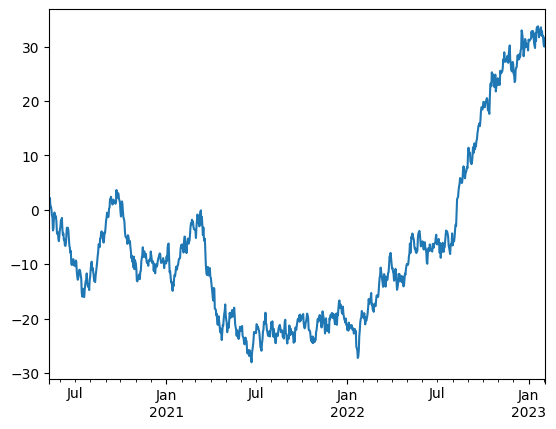

In [65]:
ts.cumsum().plot()

**If running under Jupyter Notebook, the plot will appear on plot().**

**Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.**

In [66]:
ts = ts.cumsum()

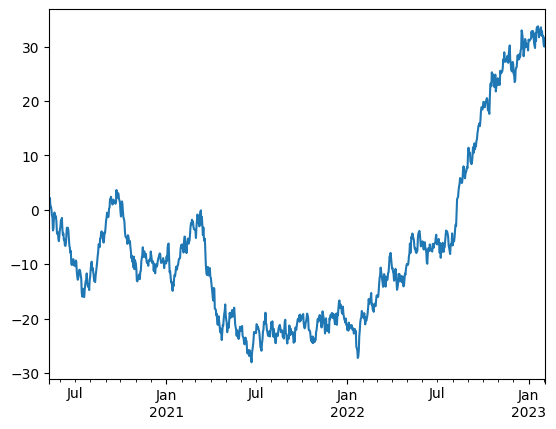

In [68]:
ts.plot()
plt.show()

In [80]:
df = pd.DataFrame(np.random.randn(1000,4),index = ts.index,columns=list('abcd'))

In [81]:
df

,a,b,c,d
2020-05-10,0.876537,-1.310529,0.549844,1.695481
2020-05-11,0.375293,1.633960,-0.187623,-0.342849
2020-05-12,-0.305138,0.895868,-0.967642,0.243243
2020-05-13,1.041420,1.187264,-0.552415,0.561059
2020-05-14,-1.136326,-0.378189,-0.761750,-0.486181
...,...,...,...,...
2023-01-30,0.673946,-0.015064,-1.818932,0.293444
2023-01-31,0.812456,-0.019077,-0.194255,-1.440520
2023-02-01,0.318515,-1.690067,1.590852,-1.032963
2023-02-02,1.421990,0.721648,1.144583,0.023616


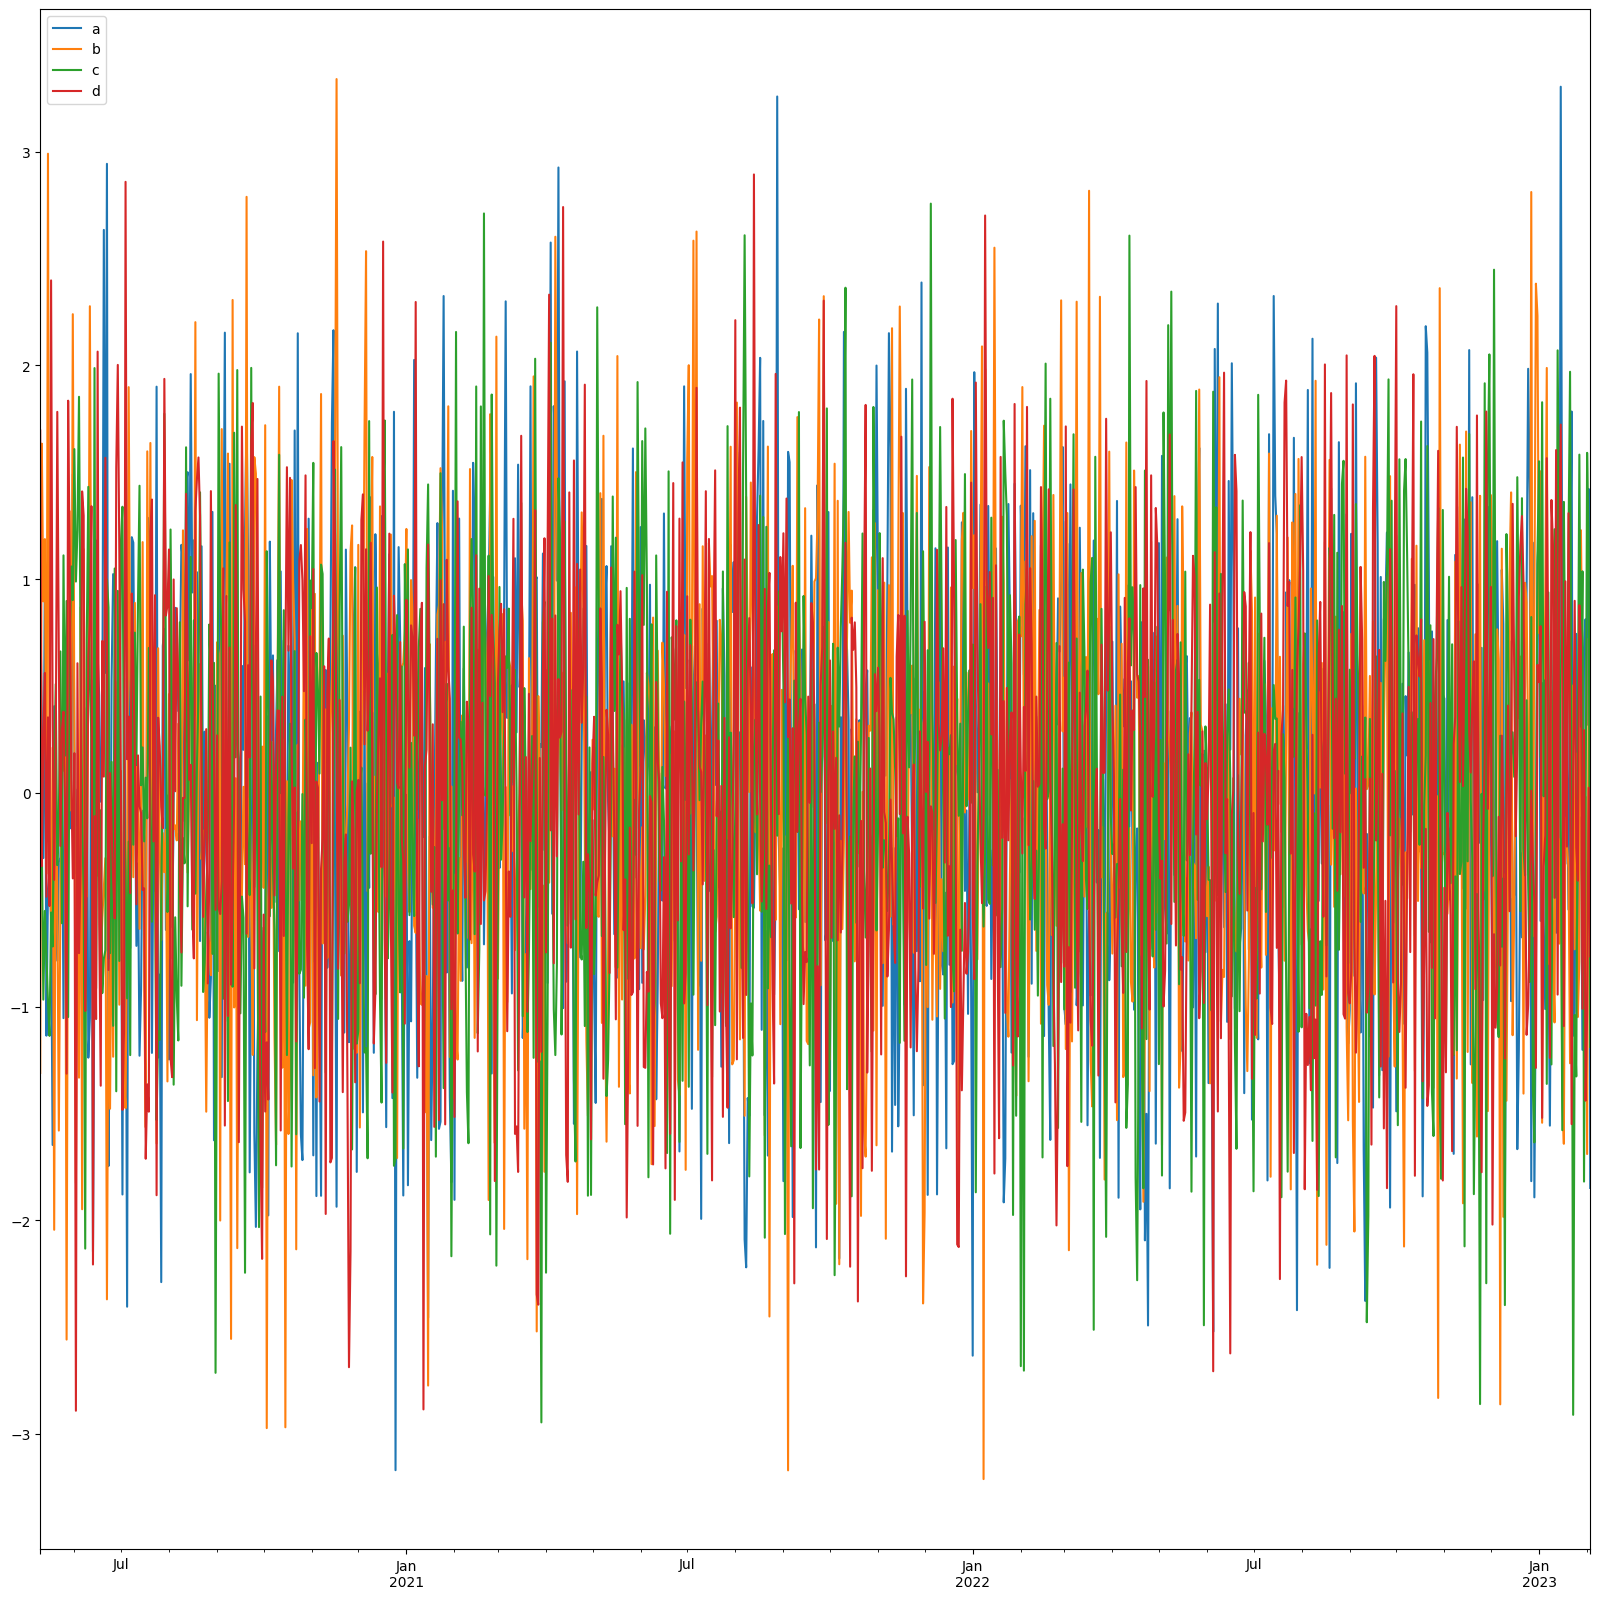

In [84]:
png = df.plot(figsize=(20,20),kind='line')
plt.show()


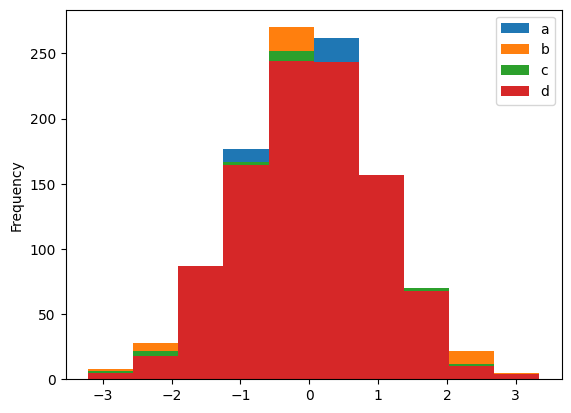

In [85]:
df.plot(kind='hist')
plt.show()

# Importing and exporting data

In [ ]:
# importing
pd.read_csv()
pd.read_hdf()# hdf file
pd.read_excel()
# exporting
df.to_csv()
df.to_hdf()
df.to_excel(sheet_name='sheet1')